In [3]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
warnings.filterwarnings('ignore')
import tensorflow 
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import confusion_matrix
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from numpy import loadtxt
from tensorflow.keras.models import Sequential
from sklearn import preprocessing
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout
from sklearn import metrics
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier
df = pd.read_csv('frdata.csv')

In [4]:
df.iloc[:,96]

0      2.974513
1      3.078794
2      2.974513
3      2.836200
4      4.999411
         ...   
205    4.983306
206    4.999889
207    4.983306
208    4.999675
209    4.998506
Name: Six_sigma_outputs, Length: 210, dtype: float64

In [5]:
X=df.iloc[:,:95].values
y=df.iloc[:,96].values

In [14]:
dataset=df.iloc[:,df.columns.get_loc('cs1'):df.columns.get_loc('fa1')]
dataset=dataset.join(df['Six_sigma_outputs'])
dataset

,cs1,cs2,cs3,cs4,Six_sigma_outputs
0,4,5,4,4,2.974513
1,5,5,5,5,3.078794
2,4,5,4,4,2.974513
3,3,5,3,3,2.836200
4,3,5,4,5,4.999411
...,...,...,...,...,...
205,4,5,5,5,4.983306
206,5,5,5,5,4.999889
207,5,5,5,4,4.983306
208,5,5,5,5,4.999675


In [15]:
#Data splitting, for random split or not
def dataRandomSet(data, random=None):
    if random != None:
        train_x, test_x, train_y, test_y = train_test_split(dataset.drop(["Six_sigma_outputs"], axis=1), 
                                                                        dataset["Six_sigma_outputs"], random_state=random, test_size=0.3)
        test_y = test_y.reset_index(drop=True)
        train_y = train_y.reset_index(drop=True)
        train_x = train_x.reset_index(drop=True)
        test_x = test_x.reset_index(drop=True)

    else:
        train_y = dataset.loc[0:210, "Six_sigma_outputs"].reset_index(drop=True)
        test_y = dataset.loc[210: , "Six_sigma_outputs"].reset_index(drop=True)
        train_x = dataset.iloc[0:210].drop("Six_sigma_outputs", axis=1).reset_index(drop=True)
        test_x = dataset.iloc[210:].drop("Six_sigma_outputs", axis=1).reset_index(drop=True)
    return train_x, train_y, test_x, test_y

In [16]:
train_x, train_y, test_x, test_y = dataRandomSet(X, 42) #Set random state to 42. You can set it later.
train_x.head()

,cs1,cs2,cs3,cs4
0,2,4,4,5
1,4,5,5,5
2,4,5,5,5
3,5,5,5,5
4,5,5,5,5


In [17]:
def print_metrics(labels, preds):
    print("Precision Score: {}".format(precision_score(labels,
           preds, average = 'weighted')))
    print("Recall Score: {}".format(recall_score(labels, preds,
           average = 'weighted')))
    print("Accuracy Score: {}".format(accuracy_score(labels,
           preds)))
    print("F1 Score: {}".format(f1_score(labels, preds, average =
           'weighted')))
#utils.multiclass.type_of_target(test_y.astype('int'))

In [18]:
from sklearn import preprocessing
from sklearn import utils
train_x=train_x.fillna(0)
lab_enc = preprocessing.LabelEncoder()
y_encod = lab_enc.fit_transform(train_y)

In [19]:
#Classification using K-NN
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_x, y_encod)
predicted = knn.predict(test_x) 
#print_metrics(test_y, predicted)
ps=precision_score(test_y.astype('int'),predicted, average = 'weighted')
print("Precision Score: {}".format(ps))
rs=recall_score(test_y.astype('int'), predicted,average = 'weighted')
print("Recall Score: {}".format(rs))
ac=accuracy_score(test_y.astype('int'),predicted)
print("Accuracy Score: {}".format(ac))
fs=f1_score(test_y.astype('int'), predicted, average ='weighted')
print("F1 Score: {}".format(fs))

Precision Score: 0.4444444444444444
Recall Score: 0.015873015873015872
Accuracy Score: 0.015873015873015872
F1 Score: 0.030651340996168577


In [20]:
a = np.array([[ps, rs], [ac, fs]])
print(np.var(a))
a=pd.DataFrame(a)

0.03368802931398481


In [21]:
from scipy.stats import chisquare
print("Mean:\n",a.mean())
print("Median:\n",a.median())
print("Mode:\n",a.mode())
print("Standard Deviation:\n",a.std())
print("Chi Square Test:")
print(chisquare(a))
print("Correlation :")
#print(type(smDf))
print(a.corr(method='kendall'))

Mean:
 0    0.230159
1    0.023262
dtype: float64
Median:
 0    0.230159
1    0.023262
dtype: float64
Mode:
           0         1
0  0.015873  0.015873
1  0.444444  0.030651
Standard Deviation:
 0    0.303046
1    0.010450
dtype: float64
Chi Square Test:
Power_divergenceResult(statistic=array([0.39901478, 0.00469429]), pvalue=array([0.52759851, 0.94537576]))
Correlation :
     0    1
0  1.0 -1.0
1 -1.0  1.0


No handles with labels found to put in legend.


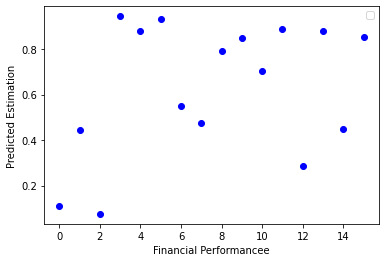

In [4]:
#Step 5:2 forcasting predictions in graph
from matplotlib import pyplot as plt

trainPredic = [0.4496,0.15873,0.0724,0.306513]
plt.plot(trainPredic)

plt.ylabel("Path Estimates of cs1-4")
plt.xlabel("Training Sets")

plt.title('Accuracy Estimation')

plt.legend()
# Display a figure.
plt.show()